## Data loading

In [1]:
import pandas as pd

# Form a dataframe
df = pd.read_excel("../data/raw.xlsx")
df = df.sort_values(by=["SECTOR", "COMPANY", "YEAR"], ascending=[True, True, True])
# df.columns = df.iloc[0]  # Assign first row values as column names
# df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
# df["Sector"], df["Company Name"] = df["Company Name"], df["Sector"]

# Assign mean values to fundamental factors based on year
# fund_col_start = "CRNCY_ADJ_MKT_CAP"
# start_idx = df.columns.get_loc(fund_col_start)
# fund_cols = df.columns[start_idx:].tolist()
# df[fund_cols] = df.groupby("Year")[fund_cols].transform("mean")

# Filter out missing Tobin Q and ESG score values
df = df[df["TOBIN_Q_RATIO"].notna() & df["ESG_SCORE"].notna()]
df

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
119,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2021,1.617933,1.56,0.445819,0.0,0.445819,0.0,...,3366.666259,59.320651,4054.239644,2.590711,3.327340,6.606612,1.87,6.49,3.703,53.5
70,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2022,1.576332,1.89,0.709630,0.0,0.709630,0.0,...,3366.255264,51.795036,3615.886939,2.590711,3.137205,5.292772,5.51,5.86,5.307,50.9
21,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2023,1.424650,2.13,1.503520,NaN,1.503520,0.0,...,3366.460749,54.035256,3703.880457,2.590711,3.555532,5.926234,2.61,5.32,5.048,52.2
276,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2018,0.962026,2.61,1.159097,0.0,1.159097,0.0,...,4625.535902,205.545512,3683.342829,1.945770,-4.631654,-19.100039,3.13,5.24,5.174,51.2
227,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2019,1.049185,2.65,1.159097,0.0,1.159097,0.0,...,4626.382966,219.654221,4536.217231,1.945770,2.706263,13.131075,2.72,5.18,5.019,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2019,1.165424,2.56,0.297121,1.5,0.297121,NaN,...,2433.916076,84.924720,7373.713156,0.059107,0.882703,2.632085,2.72,5.18,5.019,49.5
185,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2020,1.082958,2.62,0.297121,1.5,0.297121,NaN,...,2433.619003,102.252712,7533.986395,0.059107,-3.552172,-11.046034,1.68,7.07,-2.066,51.3
136,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2021,0.974853,2.35,0.297121,1.5,0.297121,NaN,...,2434.361821,89.817365,7510.948902,0.059107,4.038886,12.769769,1.87,6.49,3.703,53.5
87,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2022,1.016282,2.29,0.297121,1.5,0.297121,NaN,...,2434.064639,64.107651,7194.859982,0.059107,4.436882,12.646059,5.51,5.86,5.307,50.9


## Data cleaning

### Communication Services

In [32]:
df_communication_services = df[df["SECTOR"] == "Communication Services"].reset_index(drop=True)
df_communication_services["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_communication_services["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(0)
df_communication_services["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_communication_services["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_communication_services["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_communication_services["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("TICKER")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("mean")
)
df_communication_services["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_communication_services["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("min")
)
df_communication_services["E_ENERGY_MANAGEMENT_ISSUE_SCORE"] = df_communication_services["E_ENERGY_MANAGEMENT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["E_ENERGY_MANAGEMENT_ISSUE_SCORE"].transform("min")
)
df_communication_services["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_communication_services["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].transform("min")
)
# df_communication_services.loc[(df_communication_services["TICKER"] == "TBIG IJ Equity") & (df_communication_services["YEAR"] == 2023), "E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_communication_services.loc[df_communication_services["TICKER"] == "TBIG IJ Equity", "E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].max()
df_communication_services["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_communication_services["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_communication_services["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_communication_services["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["E_WASTE_MANAGEMENT_ISSUE_SCORE"].transform("min")
)
df_communication_services["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_communication_services["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_communication_services["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_communication_services["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].transform("min")
)
df_communication_services["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_communication_services["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(
    df_communication_services.groupby("YEAR")["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].transform("min")
)
df_communication_services["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_communication_services["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(
    df_communication_services.groupby("YEAR")["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].transform("min")
)
df_communication_services["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_communication_services["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_communication_services["G_SHAREHOLDER_RIGHTS_THEME_SCR"] = df_communication_services["G_SHAREHOLDER_RIGHTS_THEME_SCR"].fillna(
    df_communication_services.groupby("YEAR")["G_SHAREHOLDER_RIGHTS_THEME_SCR"].transform("min")
)
df_communication_services
# df[df["SECTOR"] == "Communication Services"]["ESG_SCORE"].hist(bins=10, edgecolor='black')
# sns.histplot(df_communication_services[df_communication_services["SECTOR"] == "Communication Services"]["ESG_SCORE"], bins=10, kde=True)

# # Function to remove outliers within each category
# def remove_outliers(group, lower=0.01, upper=0.99):
#     lower_bound = group.quantile(lower)
#     upper_bound = group.quantile(upper)
#     return group[(group >= lower_bound) & (group <= upper_bound)]

# # Apply function by category
# df_filtered = df.groupby("SECTOR")["ESG_SCORE"].apply(remove_outliers).reset_index(drop=True)

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2021,1.617933,1.56,0.445819,0.0,0.445819,0.000000,...,3366.666259,59.320651,4054.239644,2.590711,3.327340,6.606612,1.87,6.49,3.703,53.5
1,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2022,1.576332,1.89,0.709630,0.0,0.709630,0.000000,...,3366.255264,51.795036,3615.886939,2.590711,3.137205,5.292772,5.51,5.86,5.307,50.9
2,MTEL IJ Equity,DAYAMITRA TELEKOMUNIKASI TBK,Communication Services,2023,1.424650,2.13,1.503520,0.0,1.503520,0.000000,...,3366.460749,54.035256,3703.880457,2.590711,3.555532,5.926234,2.61,5.32,5.048,52.2
3,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2018,0.962026,2.61,1.159097,0.0,1.159097,0.000000,...,4625.535902,205.545512,3683.342829,1.945770,-4.631654,-19.100039,3.13,5.24,5.174,51.2
4,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2019,1.049185,2.65,1.159097,0.0,1.159097,0.000000,...,4626.382966,219.654221,4536.217231,1.945770,2.706263,13.131075,2.72,5.18,5.019,49.5
5,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2020,1.248028,3.01,1.162905,0.0,1.162905,0.000000,...,4625.253616,215.437651,4508.347576,1.945770,-1.141347,-5.828464,1.68,7.07,-2.066,51.3
6,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2021,1.386609,3.01,1.251519,0.0,1.251519,0.000000,...,4626.665390,328.689933,4452.359576,1.945770,10.700734,64.138456,1.87,6.49,3.703,53.5
7,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2022,1.188673,2.27,1.184949,0.0,1.184949,0.000000,...,4626.100577,178.471175,7329.421938,1.945770,5.335549,25.175803,5.51,5.86,5.307,50.9
8,ISAT IJ Equity,INDOSAT TBK PT,Communication Services,2023,1.390872,3.58,1.269295,0.0,1.269295,0.000000,...,4626.382966,159.813030,7453.368568,1.945770,3.946405,15.252923,2.61,5.32,5.048,52.2
9,MSIN IJ Equity,MNC DIGITAL ENTERTAINMENT TB,Communication Services,2021,5.400390,2.46,3.978118,0.0,3.978118,0.000000,...,2761.494359,12.028981,382.588735,-0.617641,10.279977,13.402447,1.87,6.49,3.703,53.5


### Consumer Discretionary 

In [3]:
df_consumer_discretionary = df[df["SECTOR"] == "Consumer Discretionary"].reset_index(drop=True)
df_consumer_discretionary["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_consumer_discretionary["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_consumer_discretionary["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_consumer_discretionary["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_consumer_discretionary["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_consumer_discretionary["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_consumer_discretionary["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_consumer_discretionary["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_consumer_discretionary["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_consumer_discretionary["FUND_NET_DEBT_EBITDA_ADJUSTED"] = df_consumer_discretionary["FUND_NET_DEBT_EBITDA_ADJUSTED"].fillna(0)
df_consumer_discretionary


,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,GOTO IJ Equity,GOTO GOJEK TOKOPEDIA TBK PT,Consumer Discretionary,2022,0.789162,1.86,2.485209,0.0,2.485209,0.0,...,5816.492692,1.989643,8977.659767,0.0,-26.886820,-29.838253,5.51,5.86,5.307,50.9
1,GOTO IJ Equity,GOTO GOJEK TOKOPEDIA TBK PT,Consumer Discretionary,2023,2.000749,3.11,2.995499,0.0,2.995499,0.0,...,5816.847746,12.136800,3514.634615,0.0,-93.522156,-111.016117,2.61,5.32,5.048,52.2


### Consumer Staples

In [4]:
df_consumer_staples = df[df["SECTOR"] == "Consumer Staples"].reset_index(drop=True)
df_consumer_staples = df_consumer_staples[df_consumer_staples["E_ENVIRONMENTAL_SCORE"] != 0].reset_index(drop=True)
df_consumer_staples["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_consumer_staples["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_consumer_staples.loc[(df_consumer_staples["TICKER"] == "CPIN IJ Equity") & (df_consumer_staples["YEAR"] == 2023), "E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_consumer_staples.loc[df_consumer_staples["TICKER"] == "CPIN IJ Equity", "E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].max()
df_consumer_staples["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_consumer_staples["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_consumer_staples["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_consumer_staples["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(
    df_consumer_staples.groupby("YEAR")["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].transform("min")
)
df_consumer_staples["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_consumer_staples["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(
    df_consumer_staples.groupby("YEAR")["E_WATER_MANAGEMENT_ISSUE_SCORE"].transform("min")
)
df_consumer_staples["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_consumer_staples["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(
    df_consumer_staples.groupby("YEAR")["E_WASTE_MANAGEMENT_ISSUE_SCORE"].transform("min")
)
df_consumer_staples["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_consumer_staples["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(
    df_consumer_staples.groupby("YEAR")["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].transform("min")
)
df_consumer_staples["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_consumer_staples["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(
    df_consumer_staples.groupby("YEAR")["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].transform("min")
)
df_consumer_staples["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_consumer_staples["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(0)
df_consumer_staples["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_consumer_staples["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_consumer_staples["FUND_NET_DEBT_EBITDA_ADJUSTED"] = df_consumer_staples["FUND_NET_DEBT_EBITDA_ADJUSTED"].fillna(
    df_consumer_staples.groupby("YEAR")["FUND_NET_DEBT_EBITDA_ADJUSTED"].transform("min")
)
df_consumer_staples

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,CPIN IJ Equity,CHAROEN POKPHAND INDONESI PT,Consumer Staples,2021,3.043466,2.90,2.451128,0.0,2.451128,0.0,...,4534.701178,24.979902,2489.363790,1.273864,10.872885,14.941558,1.87,6.49,3.703,53.5
1,CPIN IJ Equity,CHAROEN POKPHAND INDONESI PT,Consumer Staples,2022,2.664801,3.01,2.872544,0.0,2.872544,0.0,...,4534.147592,35.488943,2569.648868,1.273864,7.778462,11.384192,5.51,5.86,5.307,50.9
2,CPIN IJ Equity,CHAROEN POKPHAND INDONESI PT,Consumer Staples,2023,2.351876,2.83,2.450918,0.0,2.450918,0.0,...,4534.424368,35.432705,2661.824324,1.273864,5.737767,8.696380,2.61,5.32,5.048,52.2
3,HMSP IJ Equity,HM SAMPOERNA TBK PT,Consumer Staples,2019,5.097775,2.96,3.030093,0.0,3.030093,0.0,...,4366.187579,1.169319,3676.089117,-0.621821,28.145185,38.631483,2.72,5.18,5.019,49.5
4,HMSP IJ Equity,HM SAMPOERNA TBK PT,Consumer Staples,2020,3.915352,2.74,3.224081,0.0,3.224081,0.0,...,4365.654662,1.030011,3567.255296,-0.621821,17.064323,26.035278,1.68,7.07,-2.066,51.3
5,HMSP IJ Equity,HM SAMPOERNA TBK PT,Consumer Staples,2021,2.564416,2.64,3.332545,0.0,3.332545,0.0,...,4366.987198,1.188548,3728.522228,-0.621821,13.890205,24.017355,1.87,6.49,3.703,53.5
6,HMSP IJ Equity,HM SAMPOERNA TBK PT,Consumer Staples,2022,2.269225,2.95,3.302999,0.0,3.302999,0.0,...,4366.454086,1.720355,3533.049075,-0.621821,11.723944,22.048712,5.51,5.86,5.307,50.9
7,HMSP IJ Equity,HM SAMPOERNA TBK PT,Consumer Staples,2023,2.342007,2.92,3.246449,0.0,3.246449,0.0,...,4366.720626,1.490764,3593.832121,-0.621821,14.707669,27.900786,2.61,5.32,5.048,52.2
8,ICBP IJ Equity,INDOFOOD CBP SUKSES MAKMUR T,Consumer Staples,2018,3.916972,1.77,1.280745,3.0,1.280745,0.0,...,7775.791572,9.063247,2382.141332,1.155288,13.868859,22.222006,3.13,5.24,5.174,51.2
9,ICBP IJ Equity,INDOFOOD CBP SUKSES MAKMUR T,Consumer Staples,2019,3.705536,1.86,1.280745,3.0,1.280745,0.0,...,7776.266168,8.806887,2795.501842,1.155288,13.790456,21.478323,2.72,5.18,5.019,49.5


### Energy

In [5]:
# TODO: IMPORTANT 'FUND_TOT_DEBT_TO_TOT_EQY' for 'BUM IJ Equity' and 2021 year is 242.91809991130796, which looks like an outlier

df_energy = df[df["SECTOR"] == "Energy"].reset_index(drop=True)
df_energy = df_energy[~((df_energy["TICKER"] == "ADRO IJ Equity") & (df_energy["YEAR"] == 2018))].reset_index(drop=True)
df_energy["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_energy["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(0)
df_energy["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_energy["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(
    df_energy.groupby("YEAR")["E_CLIMATE_EXPOS_ISSUE_SCORE"].transform("min")
)
df_energy["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_energy["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(
    df_energy.groupby("TICKER")["E_CLIMATE_EXPOS_ISSUE_SCORE"].transform("mean")
)
df_energy["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_energy["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_energy.groupby("TICKER")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("mean")
)
df_energy["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_energy["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_energy["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_energy["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(0)
df_energy["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_energy["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(0)
df_energy["FUND_RETURN_COM_EQY"] = df_energy["FUND_RETURN_COM_EQY"].fillna(
    df_energy.groupby("TICKER")["FUND_RETURN_COM_EQY"].transform("mean")
)
df_energy

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,ADRO IJ Equity,ALAMTRI RESOURCES INDONESIA,Energy,2019,0.978469,4.45,4.894377,0.0,4.682667,6.347363,...,4524.437550,49.117549,7217.105000,-0.760826,5.661773,10.952960,2.72,5.18,5.019,49.5
1,ADRO IJ Equity,ALAMTRI RESOURCES INDONESIA,Energy,2020,0.928927,4.69,5.436446,0.0,5.125851,5.944551,...,4523.885318,38.162605,6381.566000,-0.760826,2.160902,3.948508,1.68,7.07,-2.066,51.3
2,ADRO IJ Equity,ALAMTRI RESOURCES INDONESIA,Energy,2021,1.103394,4.74,6.130639,0.0,5.645320,6.237526,...,4525.266151,36.052477,7586.936000,-0.760826,13.365671,23.786690,1.87,6.49,3.703,53.5
3,ADRO IJ Equity,ALAMTRI RESOURCES INDONESIA,Energy,2022,1.154739,5.04,6.089370,0.0,6.035492,6.570519,...,4524.989917,24.246408,10782.307000,-0.760826,27.144069,49.069713,5.51,5.86,5.307,50.9
4,ADRO IJ Equity,ALAMTRI RESOURCES INDONESIA,Energy,2023,0.809254,5.09,5.722153,0.0,5.751782,6.826174,...,4524.989917,19.426435,10472.711000,-0.760826,15.445172,25.652936,2.61,5.32,5.048,52.2
5,BUMI IJ Equity,BUMI RESOURCES TBK PT,Energy,2021,1.196385,4.85,5.461706,0.0,5.461706,7.826722,...,2810.914390,242.918100,4223.787286,2.077864,4.391290,0.699885,1.87,6.49,3.703,53.5
6,BUMI IJ Equity,BUMI RESOURCES TBK PT,Energy,2022,1.507312,4.89,5.365861,0.0,5.365861,8.355715,...,2810.571239,8.712115,4488.046969,2.077864,12.058869,0.699885,5.51,5.86,5.307,50.9
7,BUMI IJ Equity,BUMI RESOURCES TBK PT,Energy,2023,1.120738,4.91,5.197524,0.0,5.197524,7.284940,...,2810.742804,11.048850,4202.694216,2.077864,0.251381,0.699885,2.61,5.32,5.048,52.2
8,UNTR IJ Equity,UNITED TRACTORS TBK PT,Energy,2018,1.414856,2.88,1.576561,0.0,1.576561,6.385227,...,5958.882343,17.954803,8059.958203,-0.082691,11.207265,22.443868,3.13,5.24,5.174,51.2
9,UNTR IJ Equity,UNITED TRACTORS TBK PT,Energy,2019,1.197641,2.67,1.485897,0.0,1.485897,6.347363,...,5959.246044,22.887112,8067.695169,-0.082691,9.923113,20.201681,2.72,5.18,5.019,49.5


### Financials

In [6]:
df_financials = df[df["SECTOR"] == "Financials"].reset_index(drop=True)
df_financials["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_financials["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(0)
df_financials["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_financials["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_financials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_financials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_financials["E_ENERGY_MANAGEMENT_ISSUE_SCORE"] = df_financials["E_ENERGY_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_financials["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_financials["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(0)
df_financials["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_financials["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_financials["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_financials["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_financials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_financials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_financials["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_financials["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(0)
df_financials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_financials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_financials["G_SHAREHOLDER_RIGHTS_THEME_SCR"] = df_financials["G_SHAREHOLDER_RIGHTS_THEME_SCR"].fillna(
    df_financials.groupby("YEAR")["G_SHAREHOLDER_RIGHTS_THEME_SCR"].transform("min")
)
df_financials["FUND_NET_DEBT_EBITDA_ADJUSTED"] = df_financials["FUND_NET_DEBT_EBITDA_ADJUSTED"].fillna(0)
df_financials

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2018,1.593329,2.17,0.084272,0.0,0.084272,0.0,...,73355.614129,6.302820,57169.747279,0.000000,3.282970,18.274567,3.13,5.24,5.174,51.2
1,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2019,1.707354,3.41,0.084272,0.0,0.084272,0.0,...,73369.047583,6.384044,66367.394526,0.000000,3.276227,17.540573,2.72,5.18,5.019,49.5
2,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2020,1.604308,4.03,0.707797,0.0,0.707797,0.0,...,73351.137404,6.973865,77240.233824,0.000000,2.720511,15.130027,1.68,7.07,-2.066,51.3
3,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2021,1.567589,3.96,0.699619,0.0,0.699619,0.0,...,73373.526494,6.105043,86266.218133,0.000000,2.727762,16.226141,1.87,6.49,3.703,53.5
4,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2022,1.633576,4.06,0.932092,0.0,0.932092,0.0,...,73364.569218,4.656032,84783.109177,0.000000,3.203657,19.227145,5.51,5.86,5.307,50.9
5,BBCA IJ Equity,BANK CENTRAL ASIA TBK PT,Financials,2023,1.650824,4.79,0.999560,0.0,0.999560,0.0,...,73369.047583,5.565350,91483.043789,0.000000,3.572677,20.993423,2.61,5.32,5.048,52.2
6,BNGA IJ Equity,BANK CIMB NIAGA TBK PT,Financials,2021,0.937835,3.95,2.400393,0.0,2.400393,0.0,...,2659.109433,28.357844,21826.459723,0.000000,1.385881,9.714597,1.87,6.49,3.703,53.5
7,BNGA IJ Equity,BANK CIMB NIAGA TBK PT,Financials,2022,0.948995,4.00,2.489820,0.0,2.489820,0.0,...,2658.784815,31.304576,19781.666280,0.000000,1.632856,11.384977,5.51,5.86,5.307,50.9
8,BNGA IJ Equity,BANK CIMB NIAGA TBK PT,Financials,2023,0.979735,4.84,2.578075,0.0,2.578075,0.0,...,2658.947114,62.870085,21723.572830,0.000000,2.019640,13.718777,2.61,5.32,5.048,52.2
9,BMRI IJ Equity,BANK MANDIRI PERSERO TBK PT,Financials,2018,1.135549,1.73,0.000000,0.0,0.000000,0.0,...,33465.568100,56.751414,83333.478478,0.000000,2.150024,14.379698,3.13,5.24,5.174,51.2


### Health Care

In [7]:
df_health = df[df["SECTOR"] == "Health Care"].reset_index(drop=True)
df_health["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_health["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(0)
df_health["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_health["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_health["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_health["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_health["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_health["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(0)
df_health["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_health["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_health["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_health["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_health["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_health["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(0)
df_health["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_health["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_health

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2018,4.120582,2.46,4.460238,0.0,4.460238,0.0,...,3533.156900,2.336824,1257.794839,-0.759576,14.136687,17.611136,3.13,5.24,5.174,51.2
1,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2019,3.963009,3.71,3.904186,0.0,3.904186,0.0,...,3533.803919,4.889655,1463.474172,-0.759576,13.052349,16.428867,2.72,5.18,5.019,49.5
2,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2020,3.303037,3.98,3.983818,0.0,3.983818,0.0,...,3532.941279,6.335143,1620.416540,-0.759576,12.763586,16.416636,1.68,7.07,-2.066,51.3
3,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2021,3.186507,4.04,4.009438,0.0,4.009438,0.0,...,3534.019645,2.944412,1802.558828,-0.759576,13.201574,17.215716,1.87,6.49,3.703,53.5
4,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2022,3.800492,3.96,3.988866,0.0,3.988866,0.0,...,3533.588220,5.284429,1756.710713,-0.759576,12.785262,16.925967,5.51,5.86,5.307,50.9
5,KLBF IJ Equity,KALBE FARMA TBK PT,Health Care,2023,2.960735,4.53,4.235202,0.0,4.235202,0.0,...,3533.803919,2.688696,1757.898141,-0.759576,10.190810,13.236739,2.61,5.32,5.048,52.2
6,SILO IJ Equity,SILOAM INTERNATIONAL HOSPITA,Health Care,2018,0.941521,1.30,3.021857,0.0,3.021857,0.0,...,2428.974214,2.819268,533.370902,-0.061073,0.211651,0.257283,3.13,5.24,5.174,51.2
7,SILO IJ Equity,SILOAM INTERNATIONAL HOSPITA,Health Care,2019,1.692062,1.46,2.234305,0.0,2.234305,0.0,...,2429.122467,4.199689,559.094533,-0.061073,-4.389170,-5.541027,2.72,5.18,5.019,49.5
8,SILO IJ Equity,SILOAM INTERNATIONAL HOSPITA,Health Care,2020,1.353468,1.62,1.014342,0.0,1.014342,0.0,...,2428.825979,10.049083,605.226643,-0.061073,1.436811,1.951657,1.68,7.07,-2.066,51.3
9,SILO IJ Equity,SILOAM INTERNATIONAL HOSPITA,Health Care,2021,1.797629,3.12,0.939628,0.0,0.939628,0.0,...,2429.567334,8.654660,653.439497,-0.061073,7.603350,10.868535,1.87,6.49,3.703,53.5


### Industrials

In [8]:
df_industrials = df[df["SECTOR"] == "Industrials"].reset_index(drop=True)
df_industrials["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_industrials["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_industrials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_industrials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_industrials["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_industrials["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(0)
df_industrials["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_industrials["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_industrials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_industrials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_industrials["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_industrials["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(0)
df_industrials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_industrials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_industrials

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,ASII IJ Equity,ASTRA INTERNATIONAL TBK PT,Industrials,2021,1.159819,3.12,3.762743,3.0,3.762743,0.0,...,12060.297865,33.618255,25796.123323,0.808522,5.725188,12.325344,1.87,6.49,3.703,53.5
1,ASII IJ Equity,ASTRA INTERNATIONAL TBK PT,Industrials,2022,1.093430,3.76,4.161276,3.0,4.161276,0.0,...,12058.825571,29.017315,26652.286064,0.808522,7.415758,15.894782,5.51,5.86,5.307,50.9
2,ASII IJ Equity,ASTRA INTERNATIONAL TBK PT,Industrials,2023,1.067520,3.83,4.049088,3.0,4.049088,0.0,...,12059.561673,37.261698,28955.236486,0.808522,7.878916,17.318607,2.61,5.32,5.048,52.2


### Information Technology

In [9]:
df_it = df[df["SECTOR"] == "Information Technology"].reset_index(drop=True)
df_it["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_it["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_it.groupby("TICKER")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("mean")
)
df_it["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"] = df_it["E_GHG_EMISSIONS_MNGT_ISSUE_SCORE"].fillna(0)
df_it["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_it["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_it["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_it["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_it["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_it["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(0)
df_it["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_it["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(0)
df_it

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,DCII IJ Equity,DCI INDONESIA TBK PT,Information Technology,2021,35.633581,2.77,3.118985,0.0,4.103518,0.0,...,5995.380690,114.028350,210.099937,0.690575,9.633588,27.025203,1.87,6.49,3.703,53.5
1,DCII IJ Equity,DCI INDONESIA TBK PT,Information Technology,2022,27.789287,3.15,4.019438,0.0,4.019438,0.0,...,5994.648787,81.922562,207.491069,0.690575,11.848334,26.273012,5.51,5.86,5.307,50.9
2,DCII IJ Equity,DCI INDONESIA TBK PT,Information Technology,2023,28.309099,3.18,4.091369,0.0,4.096889,0.0,...,5995.014716,51.421509,238.856809,0.690575,14.918144,27.910955,2.61,5.32,5.048,52.2


### Materials

In [16]:
df_materials = df[df["SECTOR"] == "Materials"].reset_index(drop=True)
df_materials["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"] = df_materials["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["E_SUSTAINABLE_PRODUCT_ISSUE_SCORE"].transform("min")
)
df_materials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_materials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_materials.groupby("TICKER")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("mean")
)
df_materials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_materials["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].transform("min")
)
df_materials["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_materials["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["E_WASTE_MANAGEMENT_ISSUE_SCORE"].transform("min")
)
df_materials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_materials["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_materials["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_materials["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].transform("min")
)
df_materials["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_materials["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].transform("min")
)
df_materials["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_materials["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(0)
df_materials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_materials["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(
    df_materials.groupby("YEAR")["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].transform("min")
)
df_materials

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,ADMR IJ Equity,ADARO MINERALS INDONESIA TBK,Materials,2022,4.057737,1.39,0.434162,0.0,0.434162,0.00,...,2622.102992,85.980543,1286.624764,-0.044563,29.499310,90.190348,5.51,5.86,5.307,50.9
1,ADMR IJ Equity,ADARO MINERALS INDONESIA TBK,Materials,2023,2.554738,2.50,1.905775,0.0,1.905775,0.00,...,2620.342332,40.822057,1695.419616,-0.266990,29.578493,58.381210,2.61,5.32,5.048,52.2
2,AMMN IJ Equity,AMMAN MINERAL INTERNASIONAL,Materials,2023,3.892129,5.92,4.350478,0.0,4.350478,0.00,...,36298.949138,69.363430,9097.053000,1.532741,3.233442,6.242179,2.61,5.32,5.048,52.2
3,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2018,1.246638,1.46,0.819355,0.0,0.819355,0.00,...,5464.058177,98.226045,7042.491000,6.618670,1.351861,6.432462,3.13,5.24,5.174,51.2
4,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2019,2.173737,1.80,1.202337,0.0,1.202337,0.00,...,5465.058798,92.011523,7182.435000,6.618670,0.620460,3.755182,2.72,5.18,5.019,49.5
5,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2020,1.772637,1.95,1.264411,0.0,1.264411,0.00,...,5463.724718,97.226791,7689.515000,6.618670,0.569838,3.377963,1.68,7.07,-2.066,51.3
6,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2021,1.414979,2.69,1.983902,0.0,1.983902,0.00,...,5465.392420,72.500879,9241.551000,6.618670,1.288932,7.078130,1.87,6.49,3.703,53.5
7,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2022,1.321721,3.21,3.375294,0.0,3.375294,0.00,...,5464.725217,106.678933,9248.254000,6.618670,0.019027,0.105650,5.51,5.86,5.307,50.9
8,BRPT IJ Equity,BARITO PACIFIC TBK PT,Materials,2023,1.630182,3.13,3.273055,0.0,3.273055,0.00,...,5465.058798,103.899411,10149.666000,6.618670,0.269266,1.598119,2.61,5.32,5.048,52.2
9,TPIA IJ Equity,CHANDRA ASRI PACIFIC TBK PT,Materials,2021,2.637481,3.75,2.468397,5.0,2.468397,0.00,...,35648.185668,36.706847,4993.060000,15.897960,3.540005,6.411843,1.87,6.49,3.703,53.5


### Utilities

In [23]:
# IMPORTANT: social features are not present (fill with 0)
# IMPORTANT: environmental features are not present for 'PGAS IJ Equity'

df_utilities = df[df["SECTOR"] == "Utilities"].reset_index(drop=True)
df_utilities["E_CLIMATE_EXPOS_ISSUE_SCORE"] = df_utilities["E_CLIMATE_EXPOS_ISSUE_SCORE"].fillna(0)
df_utilities["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"] = df_utilities["E_ECOLOGICAL_IMPACT_ISSUE_SCORE"].fillna(0)
df_utilities["E_ENERGY_MANAGEMENT_ISSUE_SCORE"] = df_utilities["E_ENERGY_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_utilities["E_WATER_MANAGEMENT_ISSUE_SCORE"] = df_utilities["E_WATER_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_utilities["E_WASTE_MANAGEMENT_ISSUE_SCORE"] = df_utilities["E_WASTE_MANAGEMENT_ISSUE_SCORE"].fillna(0)
df_utilities["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"] = df_utilities["S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE"].fillna(0)
df_utilities["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"] = df_utilities["S_LABOR_EMPLYMNT_PRACT_ISSUE_SCORE"].fillna(0)
df_utilities["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"] = df_utilities["S_PRODUCT_QUALITY_MNGT_ISSUE_SCORE"].fillna(0)
df_utilities["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"] = df_utilities["S_DATA_SEC_CSTMR_PRIVCY_ISSUE_SCR"].fillna(0)
df_utilities["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"] = df_utilities["S_COMM_RIGHTS_RELATION_ISSUE_SCORE"].fillna(0)
df_utilities["G_SHAREHOLDER_RIGHTS_THEME_SCR"] = df_utilities["G_SHAREHOLDER_RIGHTS_THEME_SCR"].fillna(0)
df_utilities

,TICKER,COMPANY,SECTOR,YEAR,TOBIN_Q_RATIO,ESG_SCORE,E_ENVIRONMENTAL_SCORE,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,E_CLIMATE_EXPOS_ISSUE_SCORE,...,FUND_CRNCY_ADJ_MKT_CAP,FUND_TOT_DEBT_TO_TOT_EQY,FUND_BS_TOT_ASSET,FUND_NET_DEBT_EBITDA_ADJUSTED,FUND_RETURN_ON_ASSET,FUND_RETURN_COM_EQY,MACRO_INFLATION,MACRO_UNEMPLOYMENT,MACRO_GDP_GROWTH,MACRO_PMI
0,BREN IJ Equity,BARITO RENEWABLES ENERGY TBK,Utilities,2023,19.392291,1.99,0.811424,0.0,0.811424,0.0,...,78195.767092,305.574793,3508.431000,3.565462,3.112565,33.799444,2.61,5.32,5.048,52.2
1,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2018,1.121499,2.46,0.297121,1.5,0.297121,0.0,...,2433.767530,107.754432,7939.273167,0.059107,3.783439,9.658585,3.13,5.24,5.174,51.2
2,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2019,1.165424,2.56,0.297121,1.5,0.297121,0.0,...,2433.916076,84.924720,7373.713156,0.059107,0.882703,2.632085,2.72,5.18,5.019,49.5
3,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2020,1.082958,2.62,0.297121,1.5,0.297121,0.0,...,2433.619003,102.252712,7533.986395,0.059107,-3.552172,-11.046034,1.68,7.07,-2.066,51.3
4,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2021,0.974853,2.35,0.297121,1.5,0.297121,0.0,...,2434.361821,89.817365,7510.948902,0.059107,4.038886,12.769769,1.87,6.49,3.703,53.5
5,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2022,1.016282,2.29,0.297121,1.5,0.297121,0.0,...,2434.064639,64.107651,7194.859982,0.059107,4.436882,12.646059,5.51,5.86,5.307,50.9
6,PGAS IJ Equity,PERUSAHAAN GAS NEGARA TBK PT,Utilities,2023,0.860716,3.59,2.053969,1.5,2.053969,0.0,...,2434.213221,43.654737,6599.238469,0.059107,4.032031,10.428969,2.61,5.32,5.048,52.2


## Forming the resulting dataframe and computing multicollinearity

<Axes: >

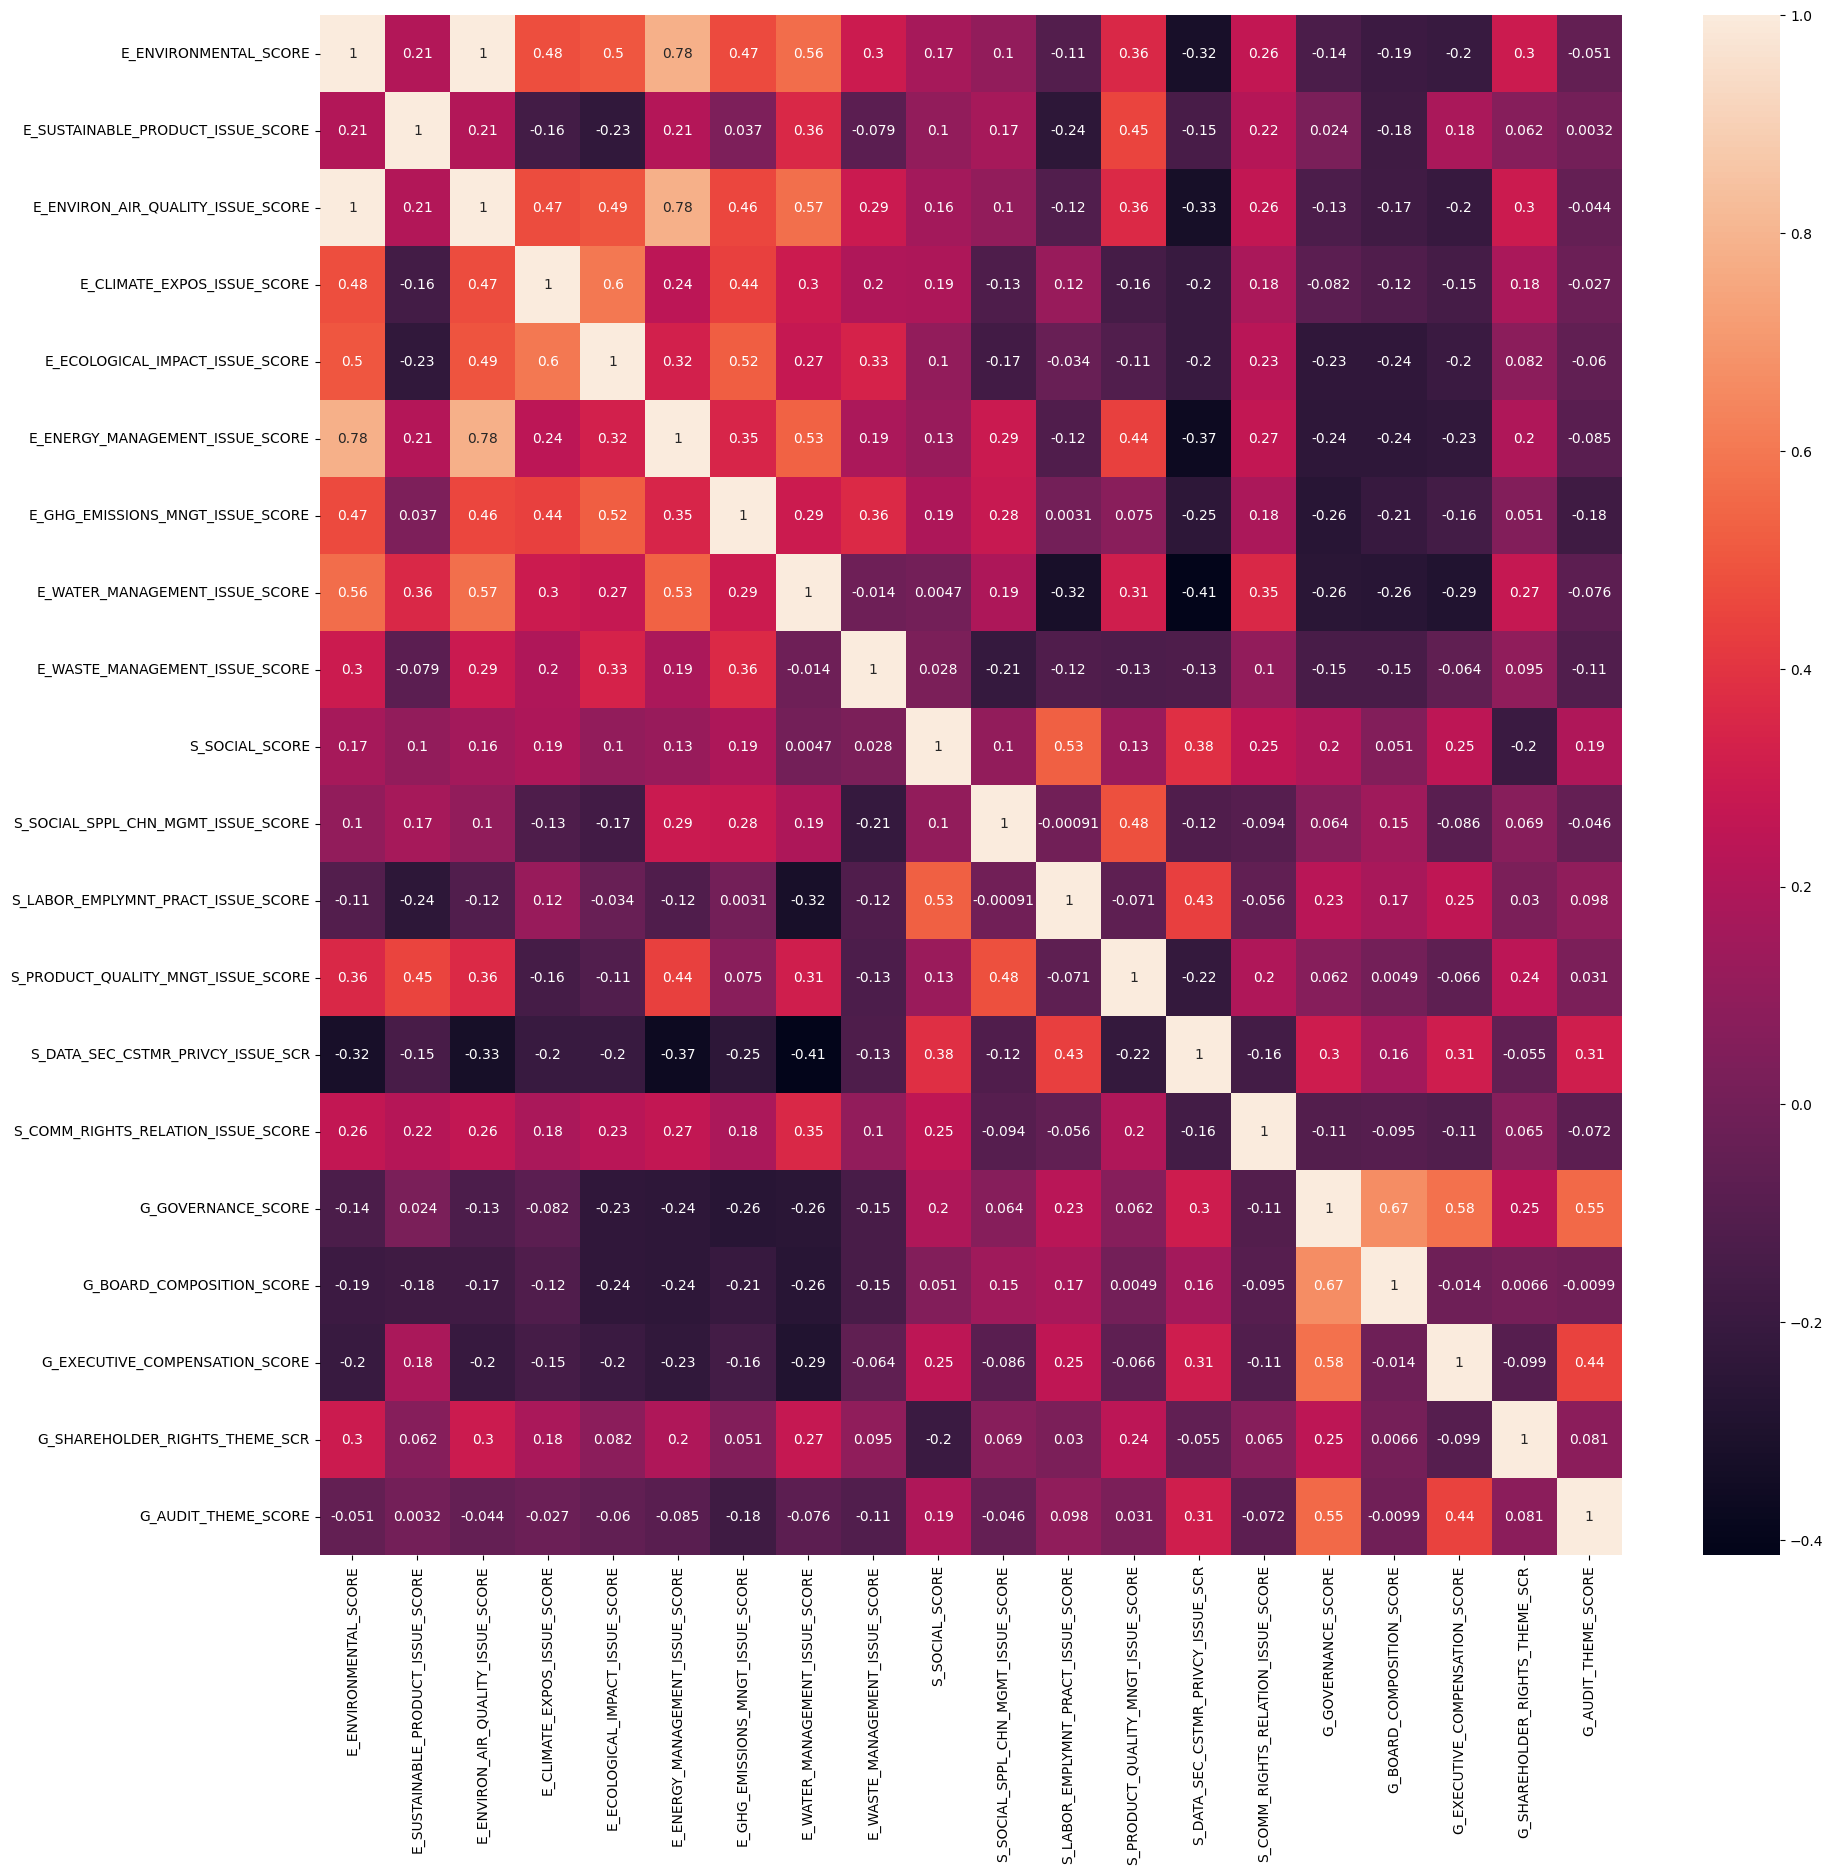

In [48]:
df_combined = pd.concat([df_communication_services, df_consumer_discretionary, df_consumer_staples, df_energy, df_financials, df_health, df_industrials, df_it, df_materials, df_utilities], ignore_index=True)
df_combined

import seaborn as sns
import matplotlib.pyplot as plt

df_check = df_combined.iloc[:, 6:26]
df_check

correlation_matrix = df_check.corr()
correlation_matrix


plt.figure(figsize=(21,20))
sns.heatmap(correlation_matrix, annot=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF
df_check = add_constant(df_check)

vif = pd.DataFrame()
vif["features"] = df_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_check.values, i) for i in range(df_check.shape[1])]
vif

,features,VIF Factor
0,const,54.876263
1,E_ENVIRONMENTAL_SCORE,122.845717
2,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,2.093453
3,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,124.152822
4,E_CLIMATE_EXPOS_ISSUE_SCORE,2.362156
5,E_ECOLOGICAL_IMPACT_ISSUE_SCORE,2.446376
6,E_ENERGY_MANAGEMENT_ISSUE_SCORE,3.730613
7,E_GHG_EMISSIONS_MNGT_ISSUE_SCORE,2.491163
8,E_WATER_MANAGEMENT_ISSUE_SCORE,2.897274
9,E_WASTE_MANAGEMENT_ISSUE_SCORE,1.665405


In [50]:
# Remove columns with high VIF
df_check_filtered = df_check.drop(columns=["E_ENVIRONMENTAL_SCORE", "S_SOCIAL_SCORE", "G_GOVERNANCE_SCORE"])

df_check_filtered = add_constant(df_check_filtered)

vif_filtered = pd.DataFrame()

vif_filtered["features"] = df_check_filtered.columns
vif_filtered["VIF Factor"] = [variance_inflation_factor(df_check_filtered.values, i) for i in range(df_check_filtered.shape[1])]
vif_filtered

,features,VIF Factor
0,const,45.557488
1,E_SUSTAINABLE_PRODUCT_ISSUE_SCORE,1.955256
2,E_ENVIRON_AIR_QUALITY_ISSUE_SCORE,4.811940
3,E_CLIMATE_EXPOS_ISSUE_SCORE,2.196516
4,E_ECOLOGICAL_IMPACT_ISSUE_SCORE,2.411882
5,E_ENERGY_MANAGEMENT_ISSUE_SCORE,3.637815
6,E_GHG_EMISSIONS_MNGT_ISSUE_SCORE,2.371819
7,E_WATER_MANAGEMENT_ISSUE_SCORE,2.442489
8,E_WASTE_MANAGEMENT_ISSUE_SCORE,1.548888
9,S_SOCIAL_SPPL_CHN_MGMT_ISSUE_SCORE,2.252914


<Axes: >

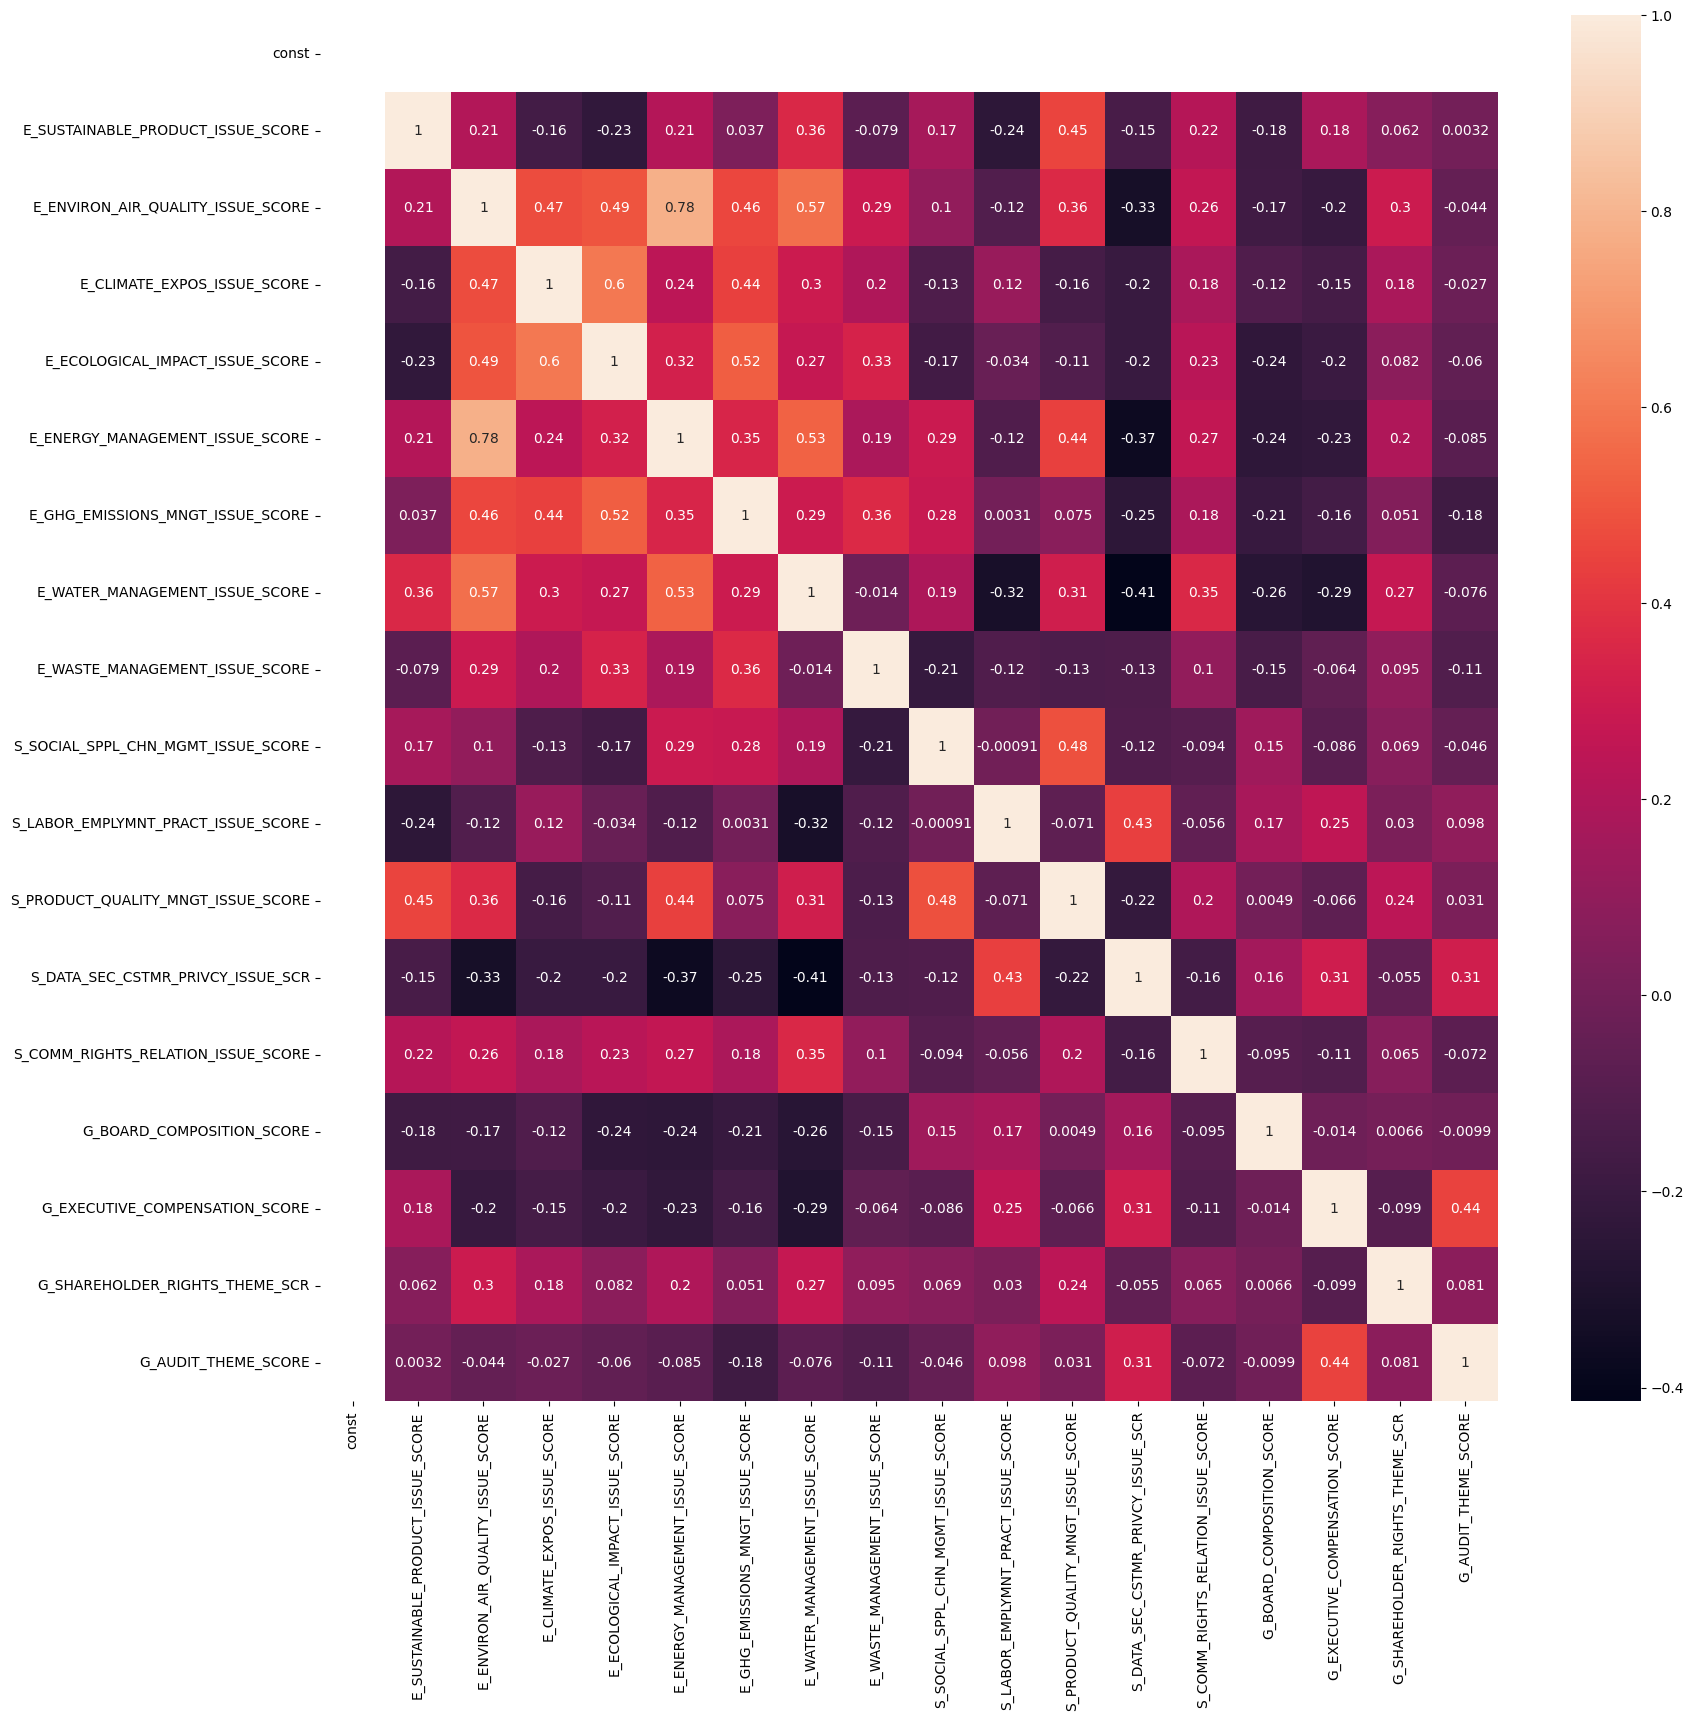

In [51]:
correlation_matrix = df_check_filtered.corr()
correlation_matrix


plt.figure(figsize=(19,18))
sns.heatmap(correlation_matrix, annot=True)

In [53]:
df_resulting = df_combined.drop(columns=["E_ENVIRONMENTAL_SCORE", "S_SOCIAL_SCORE", "G_GOVERNANCE_SCORE"])
df_resulting.to_csv("../data/processed.csv")